In [ ]:
from google.colab import drive

# References
- Code References: https://medium.com/@girishajmera/fine-tuning-yolov10-for-custom-object-detection-7b12093691c8

- mAP50/mAP50_95: https://docs.ultralytics.com/guides/yolo-performance-metrics/#class-wise-metrics

- Reference of training result:https://github.com/ultralytics/ultralytics/issues/2789
  - box_om / box_oo
  - cls_om / cls_oo
  - dfl_om / dfl_oo

- Download yolov5 model from Pytorch: https://pytorch.org/hub/ultralytics_yolov5/

- How to freeze specific layers of the model based on Pytorch architecture: https://python.plainenglish.io/how-to-freeze-model-weights-in-pytorch-for-transfer-learning-step-by-step-tutorial-a533a58051ef

- How to build a YoLo model with ultralytics library from .pt tile: https://docs.ultralytics.com/modes/train/#usage-examples


# Needed Packages

In [ ]:
# For download dataset from Kaggle
!pip install opendatasets -U
# For download dataset from roboflow
!pip install -q supervision roboflow
# For update the ultralytics library to prevent errors: https://github.com/THU-MIG/yolov10/issues/440
!pip install -U ultralytics
!pip install albumentations==1.4
# For yolov10 in ultralytics
!pip install git+https://github.com/THU-MIG/yolov10.git

In [ ]:
import os
import glob
import cv2
import pandas as pd

# dataset related
import opendatasets as od
# model related
from ultralytics import YOLOv10, YOLO

# viusalization related
import matplotlib.pyplot as plt
import seaborn as sns

# Download Dataset From Kaggle

In [ ]:
# Assign the Kaggle data set URL into variable
dataset = "https://www.kaggle.com/datasets/safurahajiheidari/kidney-stone-images"
# Using opendatasets let's download the data sets
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hsinping0324
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/safurahajiheidari/kidney-stone-images


100%|██████████| 21.1M/21.1M [00:02<00:00, 10.2MB/s]


# Finetuning with Yolov10

In [ ]:
checkpoint = "jameslahm/yolov10n"
model = YOLOv10.from_pretrained(checkpoint)
model

YOLOv10(
  (model): YOLOv10DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track

In [ ]:
data_yaml_path = "/content/kidney-stone-images/data.yaml"
model.train(data=data_yaml_path,
                epochs=100,
                patience=10,
                batch=4,
                imgsz=640)

New https://pypi.org/project/ultralytics/8.3.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.yaml, data=/content/kidney-stone-images/data.yaml, epochs=100, time=None, patience=10, batch=4, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

100%|██████████| 755k/755k [00:00<00:00, 115MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 29.8MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt 

AMP: checks passed ✅


/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py:276: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/kidney-stone-images/train/labels... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<00:00, 1738.40it/s]

train: New cache created: /content/kidney-stone-images/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/kidney-stone-images/valid/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 1367.25it/s]

val: New cache created: /content/kidney-stone-images/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      1/100     0.916G      3.775      14.09      2.983      2.718       22.2      2.345          8        640: 100%|██████████| 264/264 [00:49<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.31it/s]

                   all        123        325      0.223       0.12     0.0758     0.0229



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      2/100     0.912G      2.907      4.321      1.868      2.982      6.328      1.701         21        640: 100%|██████████| 264/264 [00:45<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.97it/s]

                   all        123        325      0.277      0.283      0.169     0.0457



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      3/100     0.914G       2.62       2.72      1.616      2.718      3.678      1.483          3        640: 100%|██████████| 264/264 [00:43<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.09it/s]

                   all        123        325      0.481      0.308      0.305     0.0956



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      4/100     0.914G      2.479      2.148      1.501      2.616      2.732      1.383          9        640: 100%|██████████| 264/264 [00:43<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.54it/s]

                   all        123        325      0.418      0.342       0.31      0.101



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      5/100     0.914G      2.403      1.819      1.427      2.582      2.308      1.326          3        640: 100%|██████████| 264/264 [00:46<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.27it/s]

                   all        123        325      0.388      0.431      0.335      0.119



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      6/100     0.914G      2.371      1.683      1.422       2.53      2.048      1.293          3        640: 100%|██████████| 264/264 [00:45<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.57it/s]

                   all        123        325      0.485      0.495      0.456      0.149



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      7/100     0.914G      2.388      1.597      1.419      2.505      1.924       1.28          4        640: 100%|██████████| 264/264 [00:45<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.61it/s]

                   all        123        325      0.493      0.422      0.393      0.131



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      8/100     0.914G      2.355      1.503      1.384      2.487      1.796      1.255          9        640: 100%|██████████| 264/264 [00:45<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.65it/s]

                   all        123        325      0.577      0.483      0.475      0.154



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      9/100     0.914G      2.311      1.419      1.355      2.489      1.688       1.23          1        640: 100%|██████████| 264/264 [00:42<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.97it/s]

                   all        123        325      0.617      0.526      0.529      0.182



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     10/100     0.914G       2.26      1.395      1.349      2.454       1.64      1.244          2        640: 100%|██████████| 264/264 [00:41<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  9.61it/s]

                   all        123        325      0.491      0.526       0.49      0.169



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     11/100     0.916G      2.256       1.35      1.352      2.478      1.626      1.246         13        640: 100%|██████████| 264/264 [00:42<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.74it/s]

                   all        123        325      0.599      0.538      0.531      0.176



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     12/100     0.914G      2.258      1.398      1.343       2.44       1.57      1.247          1        640: 100%|██████████| 264/264 [00:43<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.61it/s]

                   all        123        325      0.572      0.572      0.547      0.187



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     13/100     0.914G      2.272       1.31      1.334      2.482      1.536      1.235          5        640: 100%|██████████| 264/264 [00:45<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.54it/s]

                   all        123        325      0.595      0.542      0.506      0.182



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     14/100     0.914G      2.244      1.304      1.336      2.422      1.575      1.216          3        640: 100%|██████████| 264/264 [00:44<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.50it/s]

                   all        123        325      0.545       0.52      0.456      0.147



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     15/100     0.914G      2.248      1.321      1.331      2.404      1.511      1.217          6        640: 100%|██████████| 264/264 [00:45<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.74it/s]

                   all        123        325      0.642      0.538      0.538      0.182



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     16/100     0.914G      2.211      1.276      1.315      2.387      1.487      1.201          8        640: 100%|██████████| 264/264 [00:45<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.42it/s]

                   all        123        325      0.607      0.599      0.577      0.211



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     17/100     0.916G       2.21      1.244      1.327      2.397      1.468      1.207          7        640: 100%|██████████| 264/264 [00:43<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.96it/s]

                   all        123        325      0.615      0.618      0.572      0.204



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     18/100     0.914G      2.126      1.183      1.294      2.372      1.423      1.195         12        640: 100%|██████████| 264/264 [00:43<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.81it/s]

                   all        123        325      0.633      0.588      0.611      0.217



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     19/100     0.914G      2.159      1.202      1.298      2.414      1.413      1.211          4        640: 100%|██████████| 264/264 [00:42<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.77it/s]

                   all        123        325      0.637      0.588      0.589      0.203



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     20/100     0.914G      2.214      1.237      1.343      2.382       1.46      1.213          4        640: 100%|██████████| 264/264 [00:43<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.63it/s]

                   all        123        325      0.593      0.566      0.505      0.175



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     21/100     0.914G      2.199      1.222       1.33       2.38      1.442      1.209          3        640: 100%|██████████| 264/264 [00:44<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.73it/s]

                   all        123        325      0.639      0.593      0.596      0.218



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     22/100     0.916G      2.164      1.186      1.288      2.332      1.385      1.174         10        640: 100%|██████████| 264/264 [00:45<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.51it/s]

                   all        123        325      0.598       0.59      0.568      0.202



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     23/100     0.914G      2.146      1.187      1.302      2.342      1.408      1.199         12        640: 100%|██████████| 264/264 [00:46<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.95it/s]

                   all        123        325      0.642       0.59      0.544      0.205



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     24/100     0.914G      2.138      1.156      1.281      2.363      1.381      1.178         14        640: 100%|██████████| 264/264 [00:45<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.08it/s]

                   all        123        325      0.633      0.622      0.601      0.232



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     25/100     0.914G      2.128      1.148      1.275      2.334      1.368      1.183         13        640: 100%|██████████| 264/264 [00:44<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.34it/s]

                   all        123        325      0.669      0.618      0.624      0.239



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     26/100     0.914G      2.106      1.154       1.29      2.325      1.367       1.18          4        640: 100%|██████████| 264/264 [00:43<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.86it/s]

                   all        123        325      0.659      0.566      0.604      0.215



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     27/100     0.914G      2.141       1.16      1.291      2.362      1.338      1.185         11        640: 100%|██████████| 264/264 [00:45<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.48it/s]

                   all        123        325      0.615      0.618      0.601      0.229



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     28/100     0.914G      2.164      1.182      1.297      2.343       1.37      1.187          5        640: 100%|██████████| 264/264 [00:45<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.71it/s]

                   all        123        325      0.653       0.59      0.596      0.222



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     29/100     0.914G      2.085      1.155      1.284      2.309      1.327      1.178          3        640: 100%|██████████| 264/264 [00:45<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.59it/s]

                   all        123        325      0.627      0.609      0.599      0.228



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     30/100     0.914G      2.135      1.163      1.284      2.337      1.347       1.18         13        640: 100%|██████████| 264/264 [00:45<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.33it/s]

                   all        123        325       0.65       0.63      0.598      0.207



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     31/100     0.914G      2.123      1.185      1.278      2.363      1.366      1.167          1        640: 100%|██████████| 264/264 [00:44<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.25it/s]

                   all        123        325      0.642        0.6      0.622      0.226



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     32/100     0.916G      2.116      1.154       1.29      2.311      1.353      1.179          5        640: 100%|██████████| 264/264 [00:44<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.50it/s]

                   all        123        325      0.636      0.643      0.603      0.218



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     33/100     0.914G      2.096      1.142      1.268       2.33      1.317      1.167          6        640: 100%|██████████| 264/264 [00:45<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.33it/s]

                   all        123        325      0.642      0.649      0.629      0.231



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     34/100     0.914G      2.105      1.127       1.26      2.319      1.304      1.168          1        640: 100%|██████████| 264/264 [00:44<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.57it/s]

                   all        123        325      0.712      0.606      0.659      0.241



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     35/100     0.914G      2.082      1.086       1.25      2.283      1.296      1.145          7        640: 100%|██████████| 264/264 [00:42<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.27it/s]

                   all        123        325      0.649      0.642      0.632      0.244



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     36/100     0.914G      2.109      1.135      1.279      2.288      1.337      1.173         12        640: 100%|██████████| 264/264 [00:44<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.48it/s]

                   all        123        325      0.653      0.644      0.633      0.227



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     37/100     0.914G      2.117      1.154      1.276      2.317      1.322      1.171          3        640: 100%|██████████| 264/264 [00:44<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.61it/s]

                   all        123        325      0.642      0.674      0.655      0.232



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     38/100     0.914G      2.096      1.084      1.259      2.292      1.298      1.161          2        640: 100%|██████████| 264/264 [00:44<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.20it/s]

                   all        123        325      0.608      0.545      0.539      0.195



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     39/100     0.914G       2.06      1.087      1.224      2.249      1.286       1.14          5        640: 100%|██████████| 264/264 [00:45<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.59it/s]

                   all        123        325       0.64      0.634      0.593      0.227



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     40/100     0.914G      2.057      1.094      1.257      2.249      1.298      1.153          3        640: 100%|██████████| 264/264 [00:45<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.55it/s]

                   all        123        325      0.657      0.634        0.6      0.222



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     41/100     0.914G      2.123      1.113      1.283      2.316      1.304      1.169         14        640: 100%|██████████| 264/264 [00:45<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.12it/s]

                   all        123        325      0.667      0.634      0.642      0.248



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     42/100     0.914G       2.03      1.079      1.235      2.249      1.276      1.145         12        640: 100%|██████████| 264/264 [00:43<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.97it/s]

                   all        123        325      0.653      0.622      0.608      0.224



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     43/100     0.914G      2.032      1.054      1.257       2.29      1.261      1.167          3        640: 100%|██████████| 264/264 [00:43<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.89it/s]

                   all        123        325      0.652      0.665      0.664      0.245



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     44/100     0.914G      2.061      1.067      1.233      2.268       1.27      1.148          8        640: 100%|██████████| 264/264 [00:44<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.59it/s]

                   all        123        325      0.681      0.591       0.64      0.232



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     45/100     0.914G      2.038      1.075      1.244      2.247      1.242      1.155         17        640: 100%|██████████| 264/264 [00:45<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.63it/s]

                   all        123        325      0.702      0.617      0.623      0.239



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     46/100     0.914G      2.029       1.06      1.243      2.236      1.274      1.143          2        640: 100%|██████████| 264/264 [00:44<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.51it/s]

                   all        123        325      0.675      0.612      0.621      0.222



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     47/100     0.914G       2.08      1.092      1.245      2.287      1.263      1.144         11        640: 100%|██████████| 264/264 [00:45<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.58it/s]

                   all        123        325      0.668      0.656      0.654      0.238



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     48/100     0.914G      2.055      1.095      1.231      2.282      1.257       1.15         11        640: 100%|██████████| 264/264 [00:44<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  9.24it/s]

                   all        123        325       0.65      0.637      0.641      0.242



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     49/100     0.914G      2.009      1.055      1.235      2.205      1.249      1.143          5        640: 100%|██████████| 264/264 [00:43<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.36it/s]

                   all        123        325      0.728      0.634      0.668      0.245



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     50/100     0.914G      2.019      1.049      1.249      2.232      1.219      1.152          8        640: 100%|██████████| 264/264 [00:43<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.54it/s]

                   all        123        325      0.658       0.64      0.635      0.213



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     51/100     0.914G      2.018      1.046      1.232       2.24      1.241      1.145          8        640: 100%|██████████| 264/264 [00:44<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.58it/s]

                   all        123        325      0.676      0.669      0.668      0.252



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     52/100     0.914G      1.986      1.028      1.221      2.197      1.241      1.139         12        640: 100%|██████████| 264/264 [00:44<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.74it/s]

                   all        123        325      0.696      0.606      0.637       0.23



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     53/100     0.914G      2.079      1.048      1.228      2.291      1.227      1.142          2        640: 100%|██████████| 264/264 [00:45<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.52it/s]

                   all        123        325      0.686      0.637      0.651      0.232



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     54/100     0.914G      1.994      1.002      1.204      2.225       1.17      1.118          5        640: 100%|██████████| 264/264 [00:44<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.84it/s]

                   all        123        325      0.681       0.68        0.7      0.261



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     55/100     0.914G      1.994      1.028      1.208      2.226      1.171      1.123         15        640: 100%|██████████| 264/264 [00:44<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.67it/s]

                   all        123        325      0.681      0.649      0.668      0.253



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     56/100     0.914G      2.037      1.053       1.24      2.238       1.21      1.145         15        640: 100%|██████████| 264/264 [00:44<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.59it/s]

                   all        123        325      0.694      0.631      0.678      0.241



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     57/100     0.914G      2.011      1.056      1.201      2.247      1.187      1.111          3        640: 100%|██████████| 264/264 [00:44<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.89it/s]

                   all        123        325      0.674      0.655      0.658      0.246



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     58/100     0.914G      2.029       1.04       1.23      2.278      1.217      1.133          7        640: 100%|██████████| 264/264 [00:43<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.15it/s]


                   all        123        325      0.678      0.631      0.684      0.247

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     59/100     0.914G       2.01      1.038      1.251      2.238      1.209      1.157         15        640: 100%|██████████| 264/264 [00:45<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.62it/s]

                   all        123        325      0.682      0.671      0.651      0.225



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     60/100     0.916G      1.992      1.037      1.211      2.203      1.202      1.124         13        640: 100%|██████████| 264/264 [00:44<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.51it/s]

                   all        123        325      0.698      0.634      0.668      0.262



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     61/100     0.914G      2.014      1.047      1.206      2.211      1.198      1.116          9        640: 100%|██████████| 264/264 [00:44<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.69it/s]

                   all        123        325      0.727      0.647      0.693      0.259



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     62/100     0.914G       1.97      1.007      1.204      2.212      1.178      1.117          8        640: 100%|██████████| 264/264 [00:44<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.52it/s]

                   all        123        325      0.715      0.643      0.705       0.27



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     63/100     0.914G      1.978       1.03      1.207      2.195      1.198      1.123          3        640: 100%|██████████| 264/264 [00:45<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  9.67it/s]

                   all        123        325      0.683      0.628      0.666      0.241



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     64/100     0.914G      1.944     0.9874      1.197      2.171       1.16       1.12         13        640: 100%|██████████| 264/264 [00:43<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.92it/s]

                   all        123        325      0.708      0.649      0.675      0.257



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     65/100     0.914G      1.983      1.006      1.201      2.202      1.186       1.12          8        640: 100%|██████████| 264/264 [00:43<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.52it/s]


                   all        123        325      0.718       0.64      0.688      0.253

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     66/100     0.916G      1.979      1.009      1.212      2.205      1.188      1.128          4        640: 100%|██████████| 264/264 [00:44<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.52it/s]

                   all        123        325      0.722      0.656      0.679      0.258



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     67/100     0.914G      1.987     0.9825      1.218      2.183      1.169      1.128          9        640: 100%|██████████| 264/264 [00:44<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.69it/s]

                   all        123        325      0.645       0.65      0.625       0.21



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     68/100     0.914G      1.958     0.9969      1.203      2.201      1.175      1.125          6        640: 100%|██████████| 264/264 [00:45<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.96it/s]

                   all        123        325      0.718      0.619      0.661      0.241



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     69/100     0.914G      1.957      0.975      1.192      2.174      1.151      1.114          7        640: 100%|██████████| 264/264 [00:45<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.59it/s]

                   all        123        325      0.684      0.685      0.688      0.252



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     70/100     0.914G      1.969     0.9877      1.214      2.165      1.195      1.115         11        640: 100%|██████████| 264/264 [00:45<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.34it/s]

                   all        123        325      0.747      0.637      0.704      0.262



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     71/100     0.914G      1.988       0.99      1.193      2.201      1.167      1.101          6        640: 100%|██████████| 264/264 [00:44<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.88it/s]

                   all        123        325      0.753      0.612      0.682      0.244



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     72/100     0.914G      1.941     0.9852      1.204        2.2      1.159      1.125          4        640: 100%|██████████| 264/264 [00:42<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.87it/s]

                   all        123        325      0.699      0.677      0.676      0.243
Stopping training early as no improvement observed in last 10 epochs. Best results observed at epoch 62, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



72 epochs completed in 0.943 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.44it/s]


                   all        123        325      0.714      0.645      0.705       0.27
Speed: 0.2ms preprocess, 9.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a884af773d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Finetuning Yolov5

In [ ]:
# Model
import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'ultralytics>=8.2.34'] not found, attempting AutoUpdate...


YOLOv5 🚀 2024-10-5 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)



100%|██████████| 14.1M/14.1M [00:00<00:00, 400MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
# Load a model
model = YOLO("yolov5s.pt")

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:01<00:00, 11.9MB/s]


In [ ]:
model.train(data=data_yaml_path,
                epochs=100,
                patience=10,
                batch=4,
                imgsz=640)

New https://pypi.org/project/ultralytics/8.3.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/content/kidney-stone-images/data.yaml, epochs=100, time=None, patience=10, batch=4, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

train: Scanning /content/kidney-stone-images/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/kidney-stone-images/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.45G      2.277      2.147      1.338          8        640: 100%|██████████| 264/264 [00:38<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  9.07it/s]

                   all        123        325      0.585      0.438      0.403      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       1.5G       2.28      1.455      1.323         21        640: 100%|██████████| 264/264 [00:38<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.20it/s]

                   all        123        325      0.478      0.382      0.339      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.38G      2.292       1.45      1.339          3        640: 100%|██████████| 264/264 [00:36<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.22it/s]

                   all        123        325      0.653      0.505      0.522      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.38G      2.231      1.381      1.336          9        640: 100%|██████████| 264/264 [00:36<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.25it/s]


                   all        123        325      0.702      0.572        0.6       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.38G      2.224      1.222      1.321          3        640: 100%|██████████| 264/264 [00:38<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  9.32it/s]

                   all        123        325      0.613      0.608      0.543      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.38G       2.18       1.27      1.306          3        640: 100%|██████████| 264/264 [00:37<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.24it/s]

                   all        123        325      0.615      0.575      0.552      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.38G      2.187      1.221      1.306          4        640: 100%|██████████| 264/264 [00:36<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.29it/s]

                   all        123        325      0.601       0.52      0.534      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.38G       2.18      1.204       1.29          9        640: 100%|██████████| 264/264 [00:36<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.67it/s]

                   all        123        325       0.74      0.614      0.614      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.38G      2.189      1.211      1.281          1        640: 100%|██████████| 264/264 [00:37<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.65it/s]

                   all        123        325      0.671      0.614      0.616      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.38G      2.099      1.206      1.275          2        640: 100%|██████████| 264/264 [00:36<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.33it/s]

                   all        123        325      0.615       0.56      0.558      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.38G      2.091      1.168      1.271         13        640: 100%|██████████| 264/264 [00:36<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.26it/s]

                   all        123        325      0.727      0.594      0.638      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.38G       2.12      1.188      1.274          1        640: 100%|██████████| 264/264 [00:37<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.05it/s]

                   all        123        325      0.778      0.648      0.646      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.38G      2.109      1.159      1.257          5        640: 100%|██████████| 264/264 [00:37<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.19it/s]

                   all        123        325      0.698      0.652      0.613      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.38G      2.126      1.191       1.27          3        640: 100%|██████████| 264/264 [00:37<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.23it/s]

                   all        123        325      0.622      0.369       0.44      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.38G      2.114      1.201      1.268          6        640: 100%|██████████| 264/264 [00:37<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.20it/s]

                   all        123        325      0.729      0.615      0.624       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.38G      2.083      1.149      1.247          8        640: 100%|██████████| 264/264 [00:37<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.16it/s]

                   all        123        325      0.666        0.6      0.607      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.38G      2.068      1.131      1.263          7        640: 100%|██████████| 264/264 [00:37<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.08it/s]

                   all        123        325      0.713      0.655       0.65      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.38G      2.049      1.088      1.236         12        640: 100%|██████████| 264/264 [00:37<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  9.02it/s]

                   all        123        325      0.734      0.643      0.634      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.38G      2.061      1.083      1.245          4        640: 100%|██████████| 264/264 [00:38<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.61it/s]

                   all        123        325      0.784      0.652      0.698      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.38G      2.055       1.11       1.27          4        640: 100%|██████████| 264/264 [00:38<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.11it/s]

                   all        123        325      0.694      0.634      0.642      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.38G      2.088      1.117      1.269          3        640: 100%|██████████| 264/264 [00:37<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.12it/s]

                   all        123        325      0.779       0.65      0.679      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.38G       2.02      1.075      1.222         10        640: 100%|██████████| 264/264 [00:37<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.62it/s]

                   all        123        325      0.756      0.658      0.659      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.38G      2.044      1.048      1.251         12        640: 100%|██████████| 264/264 [00:36<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.25it/s]

                   all        123        325      0.679      0.674      0.664      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.39G      2.054      1.083      1.234         14        640: 100%|██████████| 264/264 [00:36<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.10it/s]

                   all        123        325      0.764      0.622       0.68      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.38G      2.017      1.058      1.228         13        640: 100%|██████████| 264/264 [00:37<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.74it/s]

                   all        123        325      0.743      0.646      0.706      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.38G      2.011      1.055      1.237          4        640: 100%|██████████| 264/264 [00:36<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.06it/s]

                   all        123        325      0.789      0.658      0.698      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.38G      2.029      1.082      1.225         11        640: 100%|██████████| 264/264 [00:37<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.07it/s]

                   all        123        325      0.758      0.652      0.687      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.38G      2.041      1.058      1.235          5        640: 100%|██████████| 264/264 [00:37<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.15it/s]

                   all        123        325      0.796      0.668      0.677      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.38G      1.979      1.068      1.224          3        640: 100%|██████████| 264/264 [00:38<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.31it/s]

                   all        123        325      0.719      0.654      0.662      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.38G      2.033      1.049      1.234         13        640: 100%|██████████| 264/264 [00:36<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.07it/s]

                   all        123        325      0.768      0.672      0.688      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.38G      2.021      1.076      1.223          1        640: 100%|██████████| 264/264 [00:36<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.21it/s]

                   all        123        325      0.785      0.698      0.719      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.38G      1.975      1.041      1.219          5        640: 100%|██████████| 264/264 [00:37<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.11it/s]

                   all        123        325      0.783      0.711      0.714      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.38G      1.993      1.018      1.216          6        640: 100%|██████████| 264/264 [00:36<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.16it/s]

                   all        123        325      0.806      0.698       0.73      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.38G       1.97      1.016      1.202          1        640: 100%|██████████| 264/264 [00:37<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.68it/s]

                   all        123        325      0.799      0.671      0.709      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.38G      1.981     0.9866        1.2          7        640: 100%|██████████| 264/264 [00:38<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.96it/s]

                   all        123        325      0.772      0.665      0.711      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.38G          2      1.043      1.224         12        640: 100%|██████████| 264/264 [00:36<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.09it/s]

                   all        123        325      0.777      0.658       0.69      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.38G      2.006      1.036      1.219          3        640: 100%|██████████| 264/264 [00:38<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.44it/s]

                   all        123        325      0.788      0.675      0.728      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.38G      1.973     0.9905      1.212          2        640: 100%|██████████| 264/264 [00:39<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.27it/s]

                   all        123        325      0.774      0.674       0.71      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.38G       1.96     0.9928      1.192          5        640: 100%|██████████| 264/264 [00:37<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.15it/s]

                   all        123        325      0.751      0.692       0.71      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.38G      1.938     0.9902      1.204          3        640: 100%|██████████| 264/264 [00:36<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.18it/s]

                   all        123        325      0.775      0.668      0.701      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.38G      1.981     0.9972      1.209         14        640: 100%|██████████| 264/264 [00:38<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.66it/s]

                   all        123        325      0.769      0.705      0.742      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.38G      1.897     0.9662      1.172         12        640: 100%|██████████| 264/264 [00:37<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.90it/s]

                   all        123        325      0.722      0.692      0.669      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.38G      1.925     0.9612      1.199          3        640: 100%|██████████| 264/264 [00:39<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.17it/s]

                   all        123        325      0.753      0.698       0.73      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.38G      1.934     0.9624      1.174          8        640: 100%|██████████| 264/264 [00:38<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.13it/s]

                   all        123        325      0.757      0.708      0.705      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.39G       1.92     0.9721      1.192         17        640: 100%|██████████| 264/264 [00:37<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.15it/s]

                   all        123        325      0.816      0.709       0.74      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.38G      1.917     0.9509      1.192          2        640: 100%|██████████| 264/264 [00:37<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.86it/s]

                   all        123        325      0.761       0.72      0.716      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.38G      1.959     0.9793      1.196         11        640: 100%|██████████| 264/264 [00:38<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  8.17it/s]

                   all        123        325      0.785      0.697      0.756      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.38G      1.918     0.9882      1.174         11        640: 100%|██████████| 264/264 [00:38<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.31it/s]

                   all        123        325      0.794      0.692      0.717      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.38G      1.863     0.9403      1.174          5        640: 100%|██████████| 264/264 [00:36<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.01it/s]

                   all        123        325      0.805       0.68      0.717       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.38G      1.898     0.9747      1.189          8        640: 100%|██████████| 264/264 [00:37<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.15it/s]

                   all        123        325       0.73      0.658      0.644      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.38G      1.913     0.9333      1.189          8        640: 100%|██████████| 264/264 [00:38<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.94it/s]

                   all        123        325      0.754      0.697      0.727      0.287
Stopping training early as no improvement observed in last 10 epochs. Best results observed at epoch 41, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



51 epochs completed in 0.569 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5s summary (fused): 193 layers, 9111923 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.94it/s]


                   all        123        325      0.768      0.705      0.743      0.317
Speed: 0.4ms preprocess, 8.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a8859bacf40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
result_csv_path = "/content/runs/detect/train/results.csv"
result_df = pd.read_csv(result_csv_path)
result_df.head()

,epoch,train/box_om,train/cls_om,train/dfl_om,train/box_oo,train/cls_oo,train/dfl_oo,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_om,val/cls_om,val/dfl_om,val/box_oo,val/cls_oo,val/dfl_oo,lr/pg0,lr/pg1,lr/pg2
0,1,3.7755,14.0900,2.9825,2.7183,22.1970,2.3448,0.22264,0.12000,0.07579,0.02287,3.0484,4.7362,2.1028,3.0801,7.9202,1.9846,0.000664,0.000664,0.000664
1,2,2.9069,4.3212,1.8676,2.9822,6.3285,1.7010,0.27736,0.28308,0.16904,0.04569,2.7256,2.9549,1.5953,2.8898,4.0385,1.5707,0.001318,0.001318,0.001318
2,3,2.6202,2.7198,1.6156,2.7181,3.6778,1.4828,0.48107,0.30769,0.30506,0.09560,2.4387,2.1032,1.4434,2.5275,2.9362,1.3085,0.001958,0.001958,0.001958
3,4,2.4789,2.1476,1.5010,2.6157,2.7325,1.3832,0.41787,0.34154,0.31036,0.10056,2.3670,2.0181,1.3707,2.6153,2.4364,1.2753,0.001941,0.001941,0.001941
4,5,2.4031,1.8195,1.4274,2.5816,2.3082,1.3255,0.38802,0.43077,0.33543,0.11919,2.2439,1.6400,1.3370,2.3774,2.0793,1.2392,0.001941,0.001941,0.001941


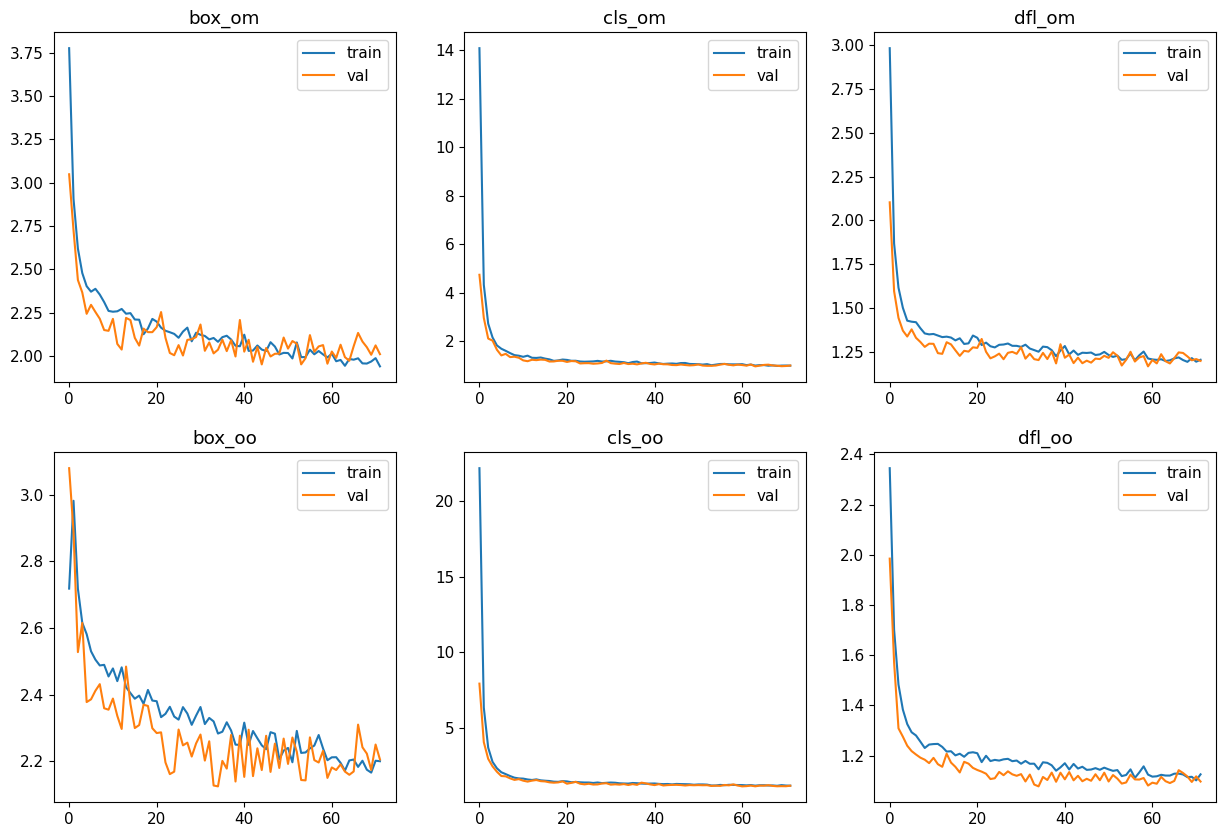

In [ ]:
def visualizing_result(result_csv_path):
    df = pd.read_csv(result_csv_path)
    train_cols = [colname for colname in df.columns.tolist() if "train" in colname]
    train_history = df[train_cols]

    val_cols = [colname for colname in df.columns.tolist() if "val" in colname]
    val_history = df[val_cols]

    n_rows = len(train_cols) // 3

    fig, ax = plt.subplots(n_rows, 3, figsize=(15,5*n_rows))

    for idx in range(n_rows*3):
        df = pd.DataFrame()
        title = train_history.columns.tolist()[idx].split("/")[-1]
        df["train"] = train_history.iloc[:, idx]
        df["val"] = val_history.iloc[:, idx]
        if n_rows > 1:
            if idx <= 2:
                df.plot(ax=ax[0, idx])
                ax[0, idx].set_title(title)
            else:
                df.plot(ax=ax[1, idx%3])
                ax[1, idx%3].set_title(title)
        else:
            df.plot(ax=ax[idx])
            ax[idx].set_title(title)
    return fig

result_csv_path = "/content/yolov10_runs/detect/train/results.csv"
fig = visualizing_result(result_csv_path)
fig

1-3-46-670589-33-1-63729118498179360400001-4700557691909127645_png_jpg.rf.e99f5f50116d4ad27af41705e52f1330.jpg
1-3-46-670589-33-1-63716408538291362100001-5294244171752463996_png_jpg.rf.476bb660f455f11cee8c00d85797c206.jpg
1-3-46-670589-33-1-63716060913016092400001-5355420116609983931_png_jpg.rf.ff5da20f8128e8660a5b39f7e7061c14.jpg
1-3-46-670589-33-1-63736644623314725800001-5699025296834445754_png_jpg.rf.7f9657f9b630bef7f1bc8b1701818dc1.jpg
1-3-46-670589-33-1-63711748853357138000001-5447441009296354974_png_jpg.rf.13aef8671ba45b493d11642184872925.jpg
1-3-46-670589-33-1-63717702095711438300001-5266161435223732945_png_jpg.rf.391d7571f19b118b0ad04b411620ed56.jpg


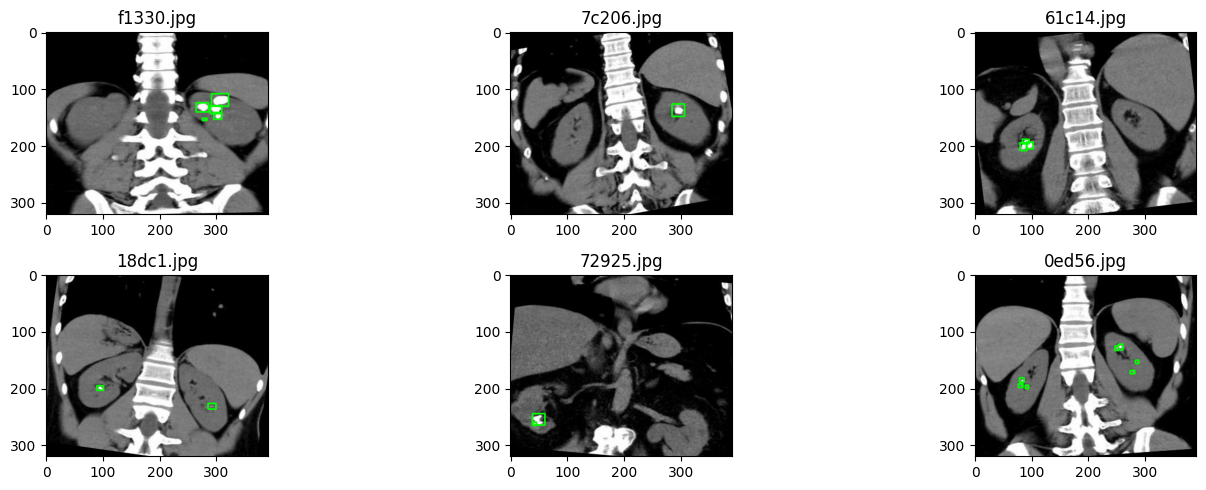

In [ ]:
def get_bbox(xywh, img_w, img_h):
    _c_x, _c_y, _w, _h = xywh
    c_x, c_y = int(_c_x*img_w), int(_c_y*img_h)
    w, h = int(_w*img_w), int(_h*img_h)
    x1, y1 = c_x-w//2, c_y-h//2
    x2, y2 = c_x+w//2, c_y+h//2
    return (x1, y1), (x2, y2)

def visualizaing_6samples(img_paths):
    fig, ax = plt.subplots(2,3, figsize=(15, 5))
    label_paths = list(map(lambda x:x.replace("/images/", "/labels/").replace(".jpg", ".txt"), img_paths))

    for idx, (img_path,labels_path) in enumerate(zip(img_paths, label_paths)):
        print(img_path.split("/")[-1])
        img = cv2.imread(img_path)
        img_h, img_w, _ = img.shape
        with open(labels_path, "r") as f:
            labels = f.readlines()
        labels = [[float(p) for p in label.replace("\n","").split()] for label in labels]
        for label in labels:
            xywh = label[1:]
            p1, p2 = get_bbox(xywh, img_w, img_h)
            cv2.rectangle(img, p1, p2, color=(0,255,0), thickness=2)
        if idx <= 2:
            ax[0, idx].imshow(img)
            ax[0, idx].set_title(img_path.split("/")[-1][-9:])

        else:
            i = idx%3
            ax[1, i].imshow(img)
            ax[1, i].set_title(img_path.split("/")[-1][-9:])

    fig.tight_layout()


root = "/content/kidney-stone-images"
subset = "train"
img_samples = glob.glob(os.path.join(root, subset, "images", "*"))[:6]

visualizaing_6samples(img_samples)

(96, 202) (104, 210)

0: 544x640 1 Tas_Var, 14.1ms
Speed: 2.9ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)
(51, 281) (63, 289)
(52, 261) (66, 275)

0: 544x640 2 Tas_Vars, 14.0ms
Speed: 3.3ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)
(279, 169) (297, 183)

0: 544x640 1 Tas_Var, 14.0ms
Speed: 4.0ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)
(273, 177) (289, 183)
(305, 203) (315, 207)

0: 544x640 3 Tas_Vars, 14.0ms
Speed: 3.4ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)
(307, 186) (327, 200)

0: 544x640 1 Tas_Var, 14.1ms
Speed: 3.4ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


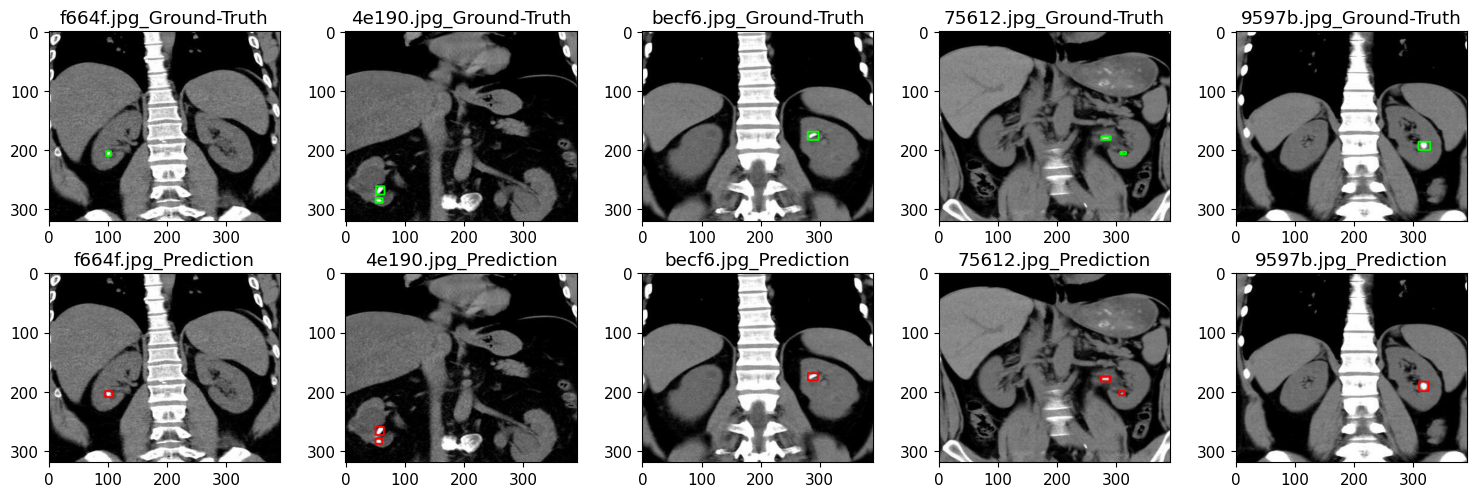

In [ ]:
def get_bbox(xywh, img_w, img_h, normalize=True):
    c_x, c_y, w, h = xywh
    if normalize:
        c_x += c_x*img_w
        c_y += c_y*img_h
        w += w*img_w
        h += h*img_h
    x1, y1 = int(c_x-w//2), int(c_y-h//2)
    x2, y2 = int(c_x+w//2), int(c_y+h//2)
    return (x1, y1), (x2, y2)

def visualizing_5inferences(img_paths):
    fig, ax = plt.subplots(2,5, figsize=(15, 5))
    label_paths = list(map(lambda x:x.replace("/images/", "/labels/").replace(".jpg", ".txt"), img_paths))

    for idx, (img_path, label_path) in enumerate(zip(img_paths, label_paths)):
        img = cv2.imread(img_path)
        img_true = img.copy()
        img_pred = img.copy()
        img_h, img_w, _ = img.shape

        with open(label_path, "r") as f:
            labels = f.readlines()
        labels = [[float(p) for p in label.replace("\n","").split()] for label in labels]
        for label in labels:
            xywh = label[1:]
            p1, p2 = get_bbox(xywh, img_w, img_h)
            print(p1, p2)
            cv2.rectangle(img_true, p1, p2, color=(0,255,0), thickness=2)
            ax[0, idx].imshow(img_true)
            ax[0, idx].set_title(f'{img_path.split("/")[-1][-9:]}_Ground-Truth')

        output = model(img)
        pred_bboxes = output[0].boxes.xywh.detach().cpu().numpy()
        for pred_box in pred_bboxes:
            x, y, w, h = pred_box
            p1 = (int(x-w/2), int(y-h/2))
            p2 = (int(x+w/2), int(y+h/2))
            cv2.rectangle(img_pred, p1, p2, color=(255,0,0), thickness=2)
            ax[1, idx].imshow(img_pred)
            ax[1, idx].set_title(f'{img_path.split("/")[-1][-9:]}_Prediction')

    fig.tight_layout()
    return fig


root = "/content/kidney-stone-images"
subset = "valid"
img_samples = glob.glob(os.path.join(root, subset, "images", "*"))[:5]

fig = visualizing_5inferences(img_samples)
fig


0: 544x640 1 Tas_Var, 14.7ms
Speed: 2.0ms preprocess, 14.7ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 10.8ms
Speed: 2.1ms preprocess, 10.8ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 14.3ms
Speed: 3.9ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 14.6ms
Speed: 4.0ms preprocess, 14.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 14.0ms
Speed: 3.6ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 15.5ms
Speed: 3.0ms preprocess, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 3 Tas_Vars, 14.0ms
Speed: 2.8ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 3 Tas_Vars, 10.1ms
Speed: 3.2ms preprocess, 10.1ms inference, 1.1ms postprocess per image at sh

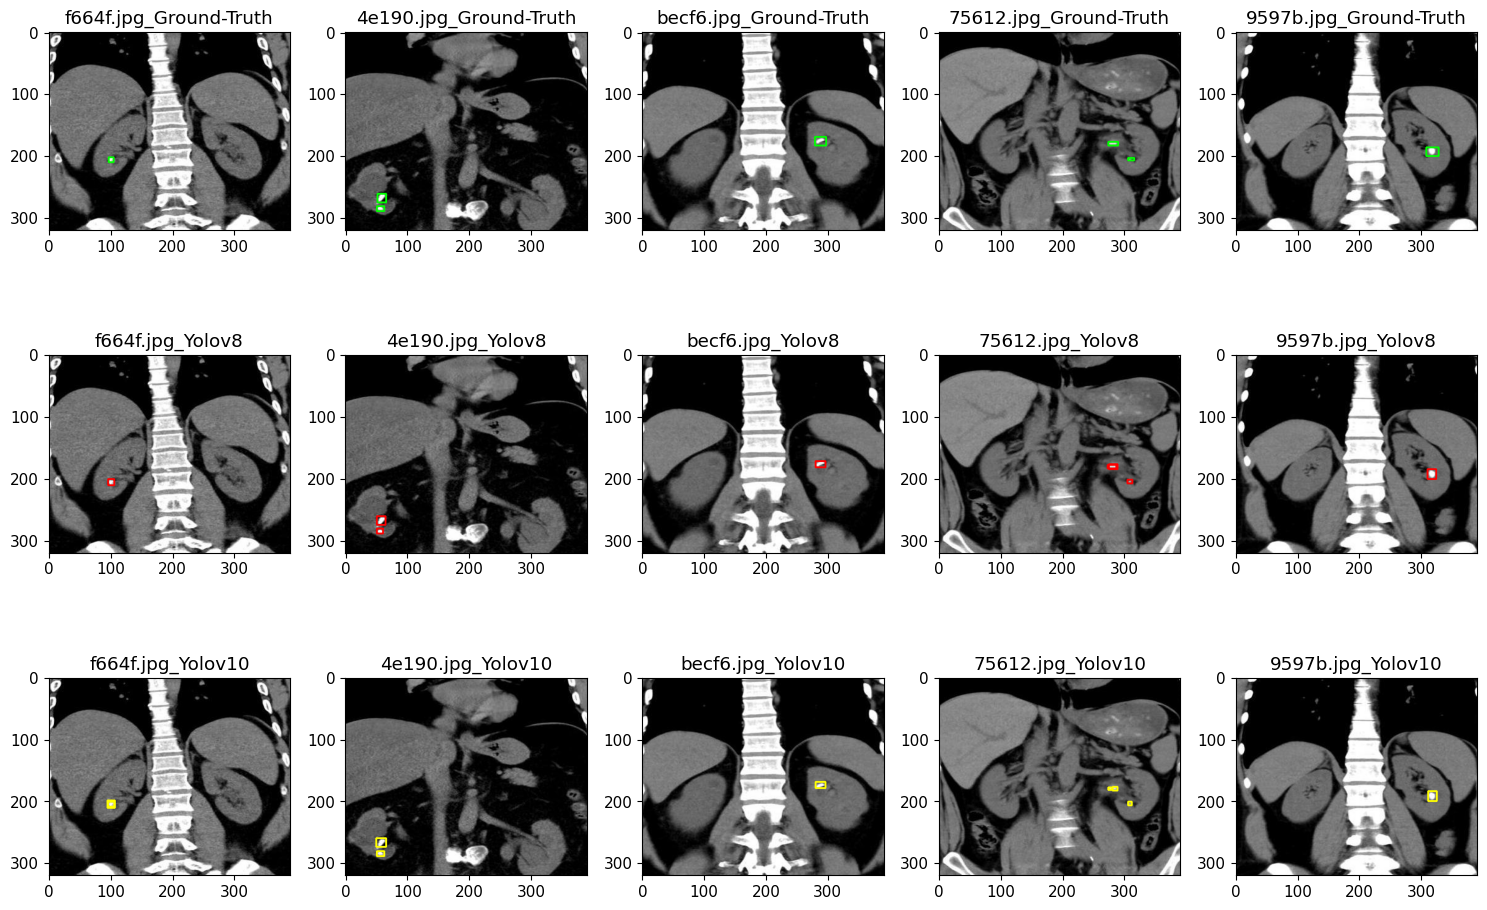

In [ ]:
def get_bbox(bbox, img_w, img_h, normalize=True):
    xywh = bbox
    c_x, c_y, w, h = xywh
    if normalize:
        c_x += c_x*img_w
        c_y += c_y*img_h
        w += w*img_w
        h += h*img_h
    x1, y1 = int(c_x-w//2), int(c_y-h//2)
    x2, y2 = int(c_x+w//2), int(c_y+h//2)
    return (x1, y1), (x2, y2)

def draw_bbox(img, p1, p2, color, ax, loc_x_y, title):
    cv2.rectangle(img, p1, p2, color=color, thickness=2)
    ax[loc_x_y[0], loc_x_y[1]].imshow(img)
    ax[loc_x_y[0], loc_x_y[1]].set_title(f'{title}')


def visualizing_5inferences_with_different_model(img_paths, model1, model2, model_tags):
    fig, ax = plt.subplots(3,5, figsize=(15, 10))
    label_paths = list(map(lambda x:x.replace("/images/", "/labels/").replace(".jpg", ".txt"), img_paths))

    for idx, (img_path, label_path) in enumerate(zip(img_paths, label_paths)):
        img = cv2.imread(img_path)
        img_true, img_pred1, img_pred2 = img.copy(), img.copy(), img.copy()
        img_h, img_w, _ = img.shape
        title_prefix = img_path.split("/")[-1][-9:]

        with open(label_path, "r") as f:
            labels = f.readlines()
        labels = [[float(p) for p in label.replace("\n","").split()] for label in labels]
        for label in labels:
            gt_bbox = label[1:]
            p1, p2 = get_bbox(gt_bbox, img_w, img_h)
            draw_bbox(img_true, p1, p2, color=(0,255,0), ax=ax, loc_x_y=[0, idx], title=f"{title_prefix}_Ground-Truth")

        output = model1(img)
        pred_bboxes = output[0].boxes.xywh.detach().cpu().numpy()
        for pred_box in pred_bboxes:
            p1, p2 = get_bbox(pred_box, img_w, img_h, normalize=False)
            draw_bbox(img_pred1, p1, p2, color=(255,0,0), ax=ax, loc_x_y=[1, idx], title=f"{title_prefix}_{model_tags[0]}")

        output = model2(img)
        pred_bboxes = output[0].boxes.xywh.detach().cpu().numpy()
        for pred_box in pred_bboxes:
            p1, p2 = get_bbox(pred_box, img_w, img_h, normalize=False)
            draw_bbox(img_pred2, p1, p2, color=(255,255,0), ax=ax, loc_x_y=[2, idx], title=f"{title_prefix}_{model_tags[1]}")

    fig.tight_layout()
    return fig


root = "/content/kidney-stone-images"
subset = "valid"
img_samples = glob.glob(os.path.join(root, subset, "images", "*"))[:5]
model_v8_path = "/content/runs/detect/train/weights/best.pt"
model_v8 = YOLO(model_v8_path)

model_v10_path = "/content/yolov10_runs/detect/train/weights/best.pt"
model_v10 = YOLOv10(model_v10_path)
model_v10
fig = visualizing_5inferences_with_different_model(img_samples, model_v8, model_v10, model_tags=["Yolov8", "Yolov10"])
fig